In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 设置中文字体
plt.rcParams['font.family'] = ['Microsoft YaHei']

In [16]:
import pandas as pd

from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/gdp.csv"
data = pd.read_csv(file_path)

data

,指标,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004
0,国内生产总值(亿元),1260582.1,1204724.0,1149237.0,1013567.0,986515.2,919281.1,832035.9,746395.1,688858.2,...,592963.2,538580.0,487940.2,412119.3,348517.7,319244.6,270092.3,219438.5,187318.9,161840.2


In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/gdp.csv"
data = pd.read_csv(file_path)

# 将数据转换成时间序列格式
# 假设第一列为指标，将其作为列名
data = data.set_index('指标').T

# 反转时间序列，从2004年开始到2023年
data = data[::-1]

# 创建ARIMA模型并拟合数据
# 这里假设使用ARIMA(1,1,1)模型，你可以根据ACF和PACF来选择合适的参数
model = ARIMA(data['国内生产总值(亿元)'], order=(1,1,1))
fit_model = model.fit()

# 进行未来的预测，假设预测未来7年
forecast = fit_model.forecast(steps=7)

# 将预测值转换为浮点数并去除科学计数法表示
forecast_float = forecast.apply(lambda x: '{:.2f}'.format(x))
print(forecast_float)


2024-01-01    1318114.20
2025-01-01    1375627.26
2026-01-01    1433121.28
2027-01-01    1490596.27
2028-01-01    1548052.23
2029-01-01    1605489.18
2030-01-01    1662907.11
Freq: AS-JAN, Name: predicted_mean, dtype: object


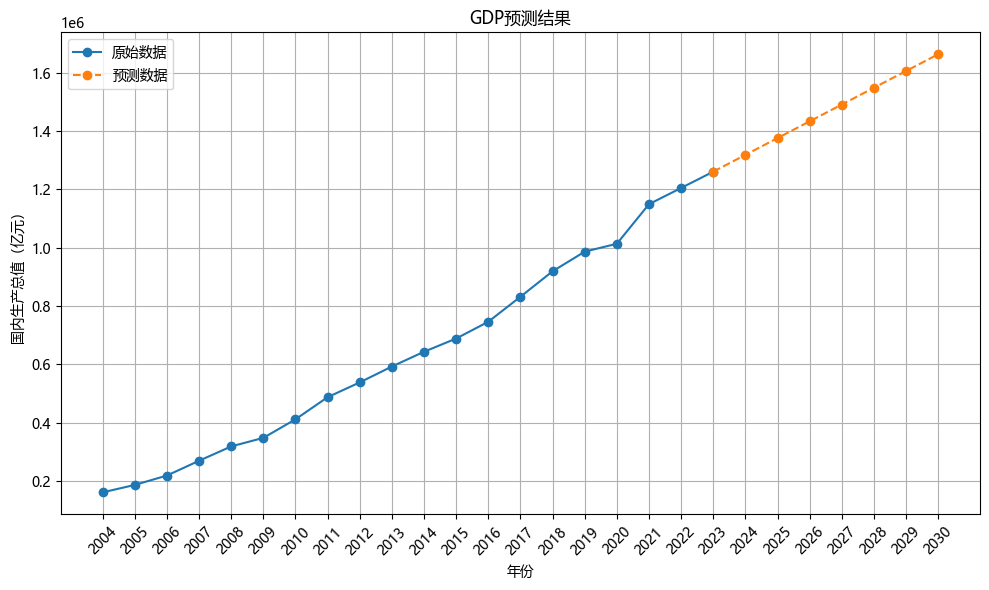

In [31]:
import matplotlib.pyplot as plt

# 将字符串格式的预测值转换为浮点数
forecast_float = forecast.apply(float)

# 创建年份列表，从2023年到2030年
years_forecast = range(2024, 2031)
years_original = range(2004, 2024)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(years_original, data['国内生产总值(亿元)'], label='原始数据', marker='o', linestyle='-')
# 将2023年的数据添加到预测数据中，确保2023年和2024年之间的数据点连接在一起
years_combined = [2023] + list(years_forecast)
gdp_combined = [data['国内生产总值(亿元)'].iloc[-1]] + list(forecast_float)
plt.plot(years_combined, gdp_combined, label='预测数据', marker='o', linestyle='--')
plt.title('GDP预测结果')
plt.xlabel('年份')
plt.ylabel('国内生产总值（亿元）')
plt.grid(True)

# 设置x轴刻度
all_years = list(years_original) + list(years_forecast)
plt.xticks(all_years, rotation=45)  # 设置x轴刻度为原始年份和预测年份的结合，并进行45度旋转以避免重叠
plt.legend()
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()



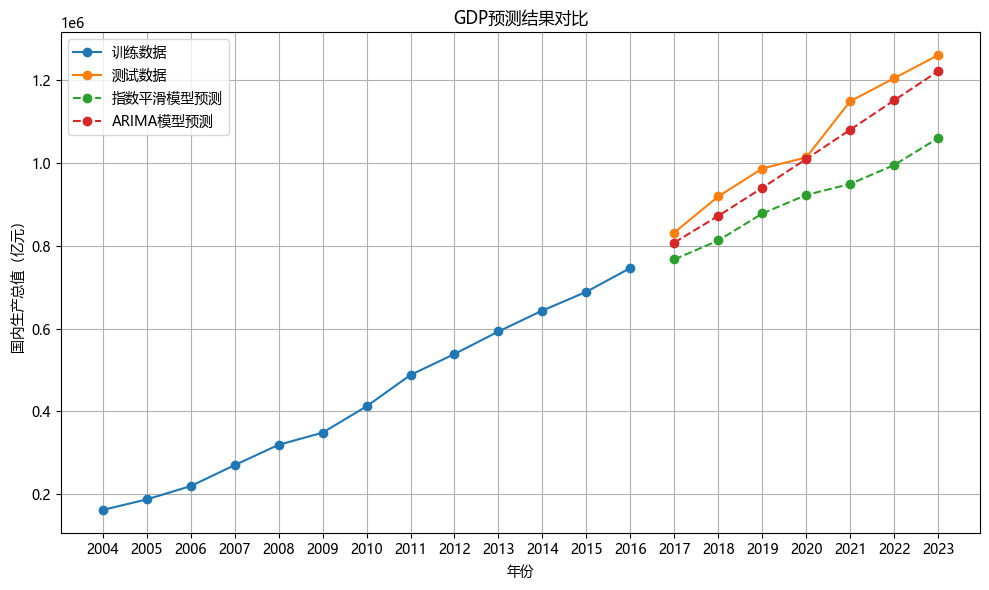

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/gdp.csv"
data = pd.read_csv(file_path)

# 将数据转换成时间序列格式
data = data.set_index('指标').T['国内生产总值(亿元)']

# 反转时间序列，从2004年开始到2023年
data = data[::-1]

# 拆分数据集为训练集和测试集
train_data = data[:-7]
test_data = data[-7:]

# 使用指数平滑模型预测未来数据
exp_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=4).fit()
exp_forecast = exp_model.forecast(steps=7)

# 使用ARIMA模型预测未来数据
arima_model = ARIMA(train_data, order=(2,4,1)).fit()
arima_forecast = arima_model.forecast(steps=7)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='训练数据', marker='o', linestyle='-')
plt.plot(test_data.index, test_data, label='测试数据', marker='o', linestyle='-')
plt.plot(test_data.index, exp_forecast, label='指数平滑模型预测', marker='o', linestyle='--')
plt.plot(test_data.index, arima_forecast, label='ARIMA模型预测', marker='o', linestyle='--')
plt.title('GDP预测结果对比')
plt.xlabel('年份')
plt.ylabel('国内生产总值（亿元）')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 使用ARIMA模型预测未来数据
arima_model = ARIMA(train_data, order=(2,4,1)).fit()

这个是一个个试试，发现2、4、1最贴合模型

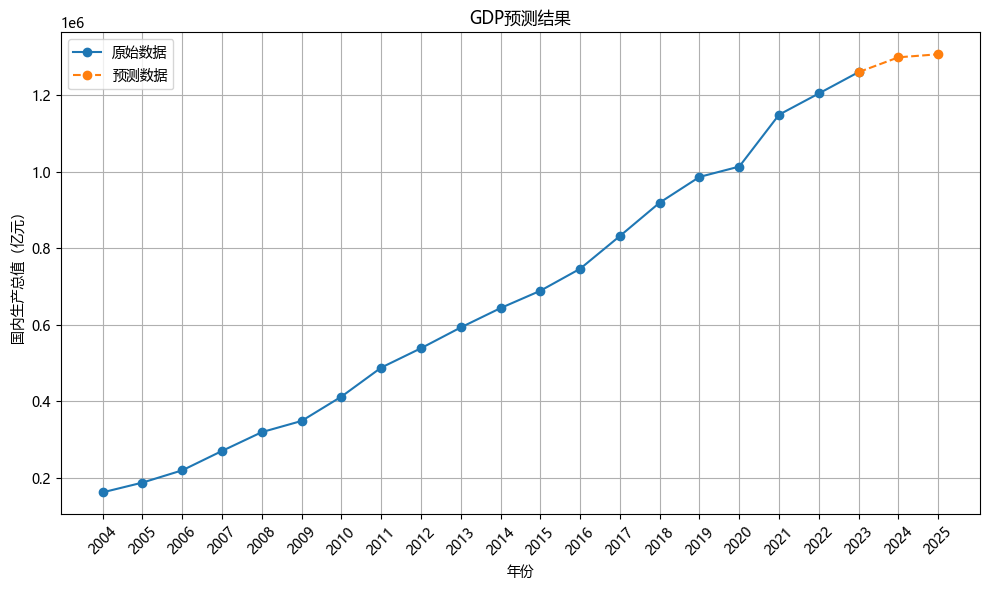

In [50]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 读取CSV文件
file_path = "./data/gdp.csv"
data = pd.read_csv(file_path)

# 将数据转换成时间序列格式
# 假设第一列为指标，将其作为列名
data = data.set_index('指标').T

# 反转时间序列，从2004年开始到2023年
data = data[::-1]

# 创建ARIMA模型并拟合数据
# 这里假设使用ARIMA(1,1,1)模型，你可以根据ACF和PACF来选择合适的参数
model = ARIMA(data['国内生产总值(亿元)'], order=(2,4,1))
fit_model = model.fit()

# 进行未来的预测，假设预测未来2年
forecast = fit_model.forecast(steps=2)

# 将预测值转换为浮点数并去除科学计数法表示
forecast_float = forecast.apply(lambda x: '{:.2f}'.format(x))

# 将字符串格式的预测值转换为浮点数
forecast_float = forecast.apply(float)

# 创建年份列表，从2023年到2026年
years_forecast = range(2024, 2026)
years_original = range(2004, 2024)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(years_original, data['国内生产总值(亿元)'], label='原始数据', marker='o', linestyle='-')
# 将2023年的数据添加到预测数据中，确保2023年和2024年之间的数据点连接在一起
years_combined = [2023] + list(years_forecast)
gdp_combined = [data['国内生产总值(亿元)'].iloc[-1]] + list(forecast_float)
plt.plot(years_combined, gdp_combined, label='预测数据', marker='o', linestyle='--')
plt.title('GDP预测结果')
plt.xlabel('年份')
plt.ylabel('国内生产总值（亿元）')
plt.grid(True)

# 设置x轴刻度
all_years = list(years_original) + list(years_forecast)
plt.xticks(all_years, rotation=45)  # 设置x轴刻度为原始年份和预测年份的结合，并进行45度旋转以避免重叠
plt.legend()
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()